# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가을 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공


## 데이터셋 API 사용
1. <span style='font-size:1.2em;font-weight:bolder'>Dataset 생성</span>
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. <span style='font-size:1.2em;font-weight:bolder'>제공 데이터 전처리</span>
    - map(함수) : 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - filter(함수): 특정 조건의 데이터만 제공하도록 처리.
        - - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.
3. <span style='font-size:1.2em;font-weight:bolder'>Dataset을 사용해 데이터 제공</span>
    - batch(), shuffle()을 이용해 제공 방식 지정
        - batch(size): 학습/평가시 한번에 제공할 batch size 지정
            - size: int. batch size 지정
            - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    -  shuffle(buffer 크기): dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - repeat(count): 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        
### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.


In [1]:
import tensorflow as tf
import numpy as np

In [2]:
raw_data = np.arange(10)
raw_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [4]:
# Dataset으로 부터 값 조회
# take()함수사용-원하는 개수만큼, 반복문 (Dataset=>Iterable타입)-전체조회
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [5]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [6]:
# 학습- model.fit(X, y)
# raw_data: X_train, raw_data2: y_train
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data, raw_data2)) 
for X, y in dataset2:
    print(X, y)
#     print(type(data))
#     print(data)
    

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [7]:
print(raw_data)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [8]:
# dataset.take(개수): 지정한 개수만큼만 조회
dataset3 = dataset.take(3) #dataset으로 부터 3개
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [9]:
# dataset.shuffle(buffer_size:정수) : dataset의 원소들을 섞어준다. buffer_size는 메모리가 허용하는 한 raw_data와 같은 개수로 지정.
# shuffle : 섞어주는 것
# shuffle(3) : 3개만 섞음
dataset4 = dataset.shuffle(10) 
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [10]:
# dataset.batch(batch_size): 한번에 제공하는 데이터의 개수
# batch(!00) : 한번에 100개씩 학습
dataset5 = dataset.batch(3)  # 한번에 3개씩 제공
print(type(dataset5))
for data in dataset5:
    print(data)
    

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [11]:
# 기본 dataset + shuffle + batch 
# a = dataset.shuffle(10)
# b = a.batch(3)
dataset = tf.data.Dataset.from_tensor_slices(raw_data)

# shuffle 된 애가 3개씩 나오도록
dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([1 6 9], shape=(3,), dtype=int32)
tf.Tensor([2 5 4], shape=(3,), dtype=int32)
tf.Tensor([8 0 3], shape=(3,), dtype=int32)
tf.Tensor([7], shape=(1,), dtype=int32)


In [12]:
# dataset.repeat(count) # 전체 데이터셋을 count 만큼 반복해서 제공, count 생략하면 무한제공
dataset7 = dataset.repeat(3) #3번 반복해서 제공
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
t

In [13]:
# 여러번 반복해서(repeat) 값을 제공할 경우 반복을 시작할 때 마다 shuffle을 한다.
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([1 0 2 3 6], shape=(5,), dtype=int32)
tf.Tensor([9 8 5 4 7], shape=(5,), dtype=int32)
tf.Tensor([6 4 3 9 8], shape=(5,), dtype=int32)
tf.Tensor([0 7 2 1 5], shape=(5,), dtype=int32)
tf.Tensor([8 4 3 2 9], shape=(5,), dtype=int32)
tf.Tensor([6 7 1 5 0], shape=(5,), dtype=int32)


In [14]:
# dataset.map(함수) : 원소들의 값을 변환해서 제공. 함수: 어떻게 변환할지 - 매개변수:dataset이 제공하는 값을 받는 변수, 반환값:dataset이 제공하는 값.
# 값들을 제곱해서 변환
# mapping함수 - 입력데이터(argument)와 출력데이터(return)의 타입이 동일해야 한다.
def mapping_func(x):
    return x**2

dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [15]:
# x : raw_data, y: raw)data2
def mapping_func2(x,y):
    
    return x**3, y**2  # x**3: raw_data에 변환값, y**2:raw_data2에 변환값

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data, raw_data2))
dataset10 = dataset2.map(mapping_func2)

In [16]:
# 중간 numpy 부분, 맨 끝 numpy부분이 각각 x, y
for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


In [17]:
# 랍도(표현)식: 함수를 연산식으로 정의한 것. lambda 매개변수들 : 반환값구현
test2 =lambda x:x+10
test3 = lambda x,y: (x+10,y**2)
test2(10), test3(20,10)

(20, (30, 100))

In [18]:
'''
dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:print(data)  를 람다식으로

한번의 연산을 할 때만 람다식. 여러번의 계산이 필요하다면 일반 함수
'''

dataset11 = dataset.map(lambda x:x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [19]:
# dataset.filter(함수): 원소들 중에서 특정 조건이 True인 값들만 제공.
# 함수-매개변수:dataset이 제공하는 값을 받을 변수. (dataset의 배열개수만큼 지정), 반환값 : Boolean

# 원소들 중에서 2의 배수만 제공하는 dataset

def filter_func(x):
    return x%2 == 0  # x가 2dml qotndls ruddn True 반환

dataset13 = dataset.filter(filter_func)  # 각각의 값을 filter_func() 넣었을 때 True를 반환하는 값만 제공.
print(type(dataset13))
for data in dataset13:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [20]:
dataset14 = dataset.filter(lambda x:x%2 ==0)
# dataset14 = dataset.filter(lambda x:x>5) # 값들 중에서 5보다 큰 값들만 제공

In [21]:
for d in dataset14:
    print(d)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [22]:
for d in dataset:
    print(d)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


![딥러닝4.jpg](image/딥러닝4.jpg)

In [23]:
raw_data = np.arange(-10, 11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data).filter(lambda x:x>=0).map(lambda y:y+10).shuffle(raw_data.size).batch(3).repeat(2)

In [24]:
for data in dataset_final:
    print(data)

tf.Tensor([15 10 20], shape=(3,), dtype=int32)
tf.Tensor([18 13 14], shape=(3,), dtype=int32)
tf.Tensor([12 17 19], shape=(3,), dtype=int32)
tf.Tensor([16 11], shape=(2,), dtype=int32)
tf.Tensor([19 14 15], shape=(3,), dtype=int32)
tf.Tensor([20 17 12], shape=(3,), dtype=int32)
tf.Tensor([11 18 16], shape=(3,), dtype=int32)
tf.Tensor([10 13], shape=(2,), dtype=int32)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [25]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models  # Layers: Deeplearning 모델의 Layer를 정의하는 클래스 들을 가진 모듈

In [26]:
# 랜덤값들의 seed값 지정
np.random.seed(0)
tf.random.set_seed(0)

In [27]:
# 데이터를 로딩
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


In [28]:
train_X[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [29]:
train_y[:3]

array([15.2, 42.3, 50. ])

In [30]:
# 하이퍼파라미터
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS = 200  # epoch수
N_BATCHS = 32   # 배치사이즈

# 변수
N_TRAIN = train_X.shape[0]  # train 데이터셋의 데이터 개수
N_TEST = test_X.shape[0]   # test 데이터셋의 데이터 개수

#### x,y 전처리, Dataset 생성

In [31]:
# X 전처리 - Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

In [32]:
# 0번째 인덱스 말고 뒤에거가 모델 갯수로 넣어주면 됨
X_train.shape

(404, 13)

In [33]:
# Dataset 구현
# drop_remainder=True : 남은 짜투리는 버려(제공하지 말아라.) - 마지막 배치의 원소 수가 batch size보다 작으면 제공하지 않겠다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

#### 모델 구현

In [50]:
# 모델(네트워크)를 정의하는 함수
def create_housing_model():
    # 모델 생성
    model = keras.Sequential()
#     model = keras.models.Sequential() : 위에거랑 같은데 이게 옛날버전임. 참고!

    # 모델에  Layer들을 추가
    model.add(layers.InputLayer((13,)))
#     model.add(layers.Dense(units=32, activation="relu"))

    '''
    첫번째 Hidden Layer에 input_shape를 지정할 수 있다.
         DenseLayer : units 개수는 2배수를 사용. top으로 갈수록 개수를 줄여나간다.
    '''
    
    model.add(layers.Dense(units=32, activation="relu", input_shape=(13,)))
    
# 밑에거는 input_shape 지정안함. input_shape는 하나의 노드에 몇개 들어오는지 정해주는 건데,
#     처음모델에서 13개 지정했고 그 다음순서가 아래 레이어니까 안정해줌. 첫번째 레이어에만 정해줌.
    model.add(layers.Dense(units=16, activation="relu"))
    model.add(layers.Dense(units=8, activation="relu"))
    
    # **출력레이어 : 회귀** - units수: 1(추론할 값이 1개), 활성함수:None
    model.add(layers.Dense(units=1))
    
    return model

In [51]:
model = create_housing_model()
print(model)

In [52]:
# 생성된 네트워크의 구조(summary)를 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 레이어당 파라미터의 개수
# 1 노드 : input 속성수 + 1
# input 속성수 * unit수 + unit수(bias의 개수)
13 * 32 + 32

448

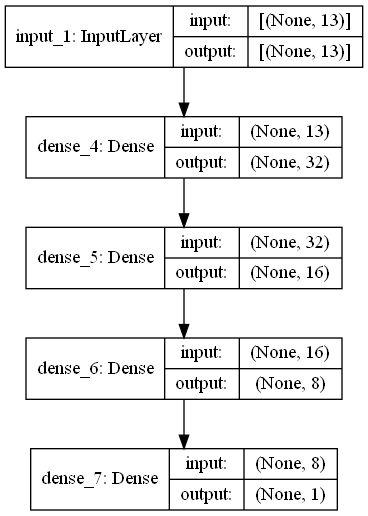

In [54]:
# 모델 구조를 그래프로 확인
# to_file은 파일경로(절대, 상대)를 지정. 생략
keras.utils.plot_model(model, show_shapes=True, to_file='housing_model.png')

#### 컴파일
    - 모델이 학습 할 때 필요한 설정을 해주는 작업
        - loss
        - optimizer
        - metrics

In [55]:
# 회귀 - Loss: mean squared error = "mse"
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))  # optimaizer를 문자열 지정: 기본설정을 사용.

#### 학습(Train)

In [56]:
# batch_size 는 train dataset을 만들때 batchs를 지정했기 때문에 따로 지정 안함. 왜냐면 배치사이즈는 한번에 데이터 몇개씩 검증할건지 이니까!
hist = model.fit(train_dataset,
                epochs=N_EPOCHS,
                validation_data=test_dataset)  # Dataset을 이용할 경우 validation_split=비율 은 사용할 수 없다.

Epoch 1/200
12/12 [==============================] - 1s 12ms/step - loss: 594.0577 - val_loss: 619.4501
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 581.0176 - val_loss: 611.4102
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 575.4075 - val_loss: 605.0936
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 567.8315 - val_loss: 597.8579
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 552.8268 - val_loss: 586.6671
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 555.4159 - val_loss: 570.1842
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 538.6273 - val_loss: 546.4211
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 514.7725 - val_loss: 514.3775
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 470.4890 - val_loss: 472.0646
Epoch 10/200
12/12 [==============================] - 0s 5ms/step - loss

12/12 [==============================] - 0s 4ms/step - loss: 9.8959 - val_loss: 22.0856
Epoch 82/200
12/12 [==============================] - 0s 6ms/step - loss: 9.8830 - val_loss: 22.4864
Epoch 83/200
12/12 [==============================] - 0s 4ms/step - loss: 9.7978 - val_loss: 22.1994
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 9.5070 - val_loss: 22.1216
Epoch 85/200
12/12 [==============================] - 0s 6ms/step - loss: 8.7389 - val_loss: 21.9392
Epoch 86/200
12/12 [==============================] - 0s 7ms/step - loss: 9.6943 - val_loss: 21.5596
Epoch 87/200
12/12 [==============================] - 0s 8ms/step - loss: 9.6121 - val_loss: 21.8267
Epoch 88/200
12/12 [==============================] - 0s 4ms/step - loss: 9.0090 - val_loss: 21.2166
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 9.0869 - val_loss: 21.3965
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 9.4828 - val_loss: 21.7084
Epo

12/12 [==============================] - 0s 4ms/step - loss: 7.3541 - val_loss: 20.2894
Epoch 162/200
12/12 [==============================] - 0s 3ms/step - loss: 7.1489 - val_loss: 20.1237
Epoch 163/200
12/12 [==============================] - 0s 3ms/step - loss: 7.2092 - val_loss: 20.5487
Epoch 164/200
12/12 [==============================] - 0s 4ms/step - loss: 7.2479 - val_loss: 20.6063
Epoch 165/200
12/12 [==============================] - 0s 4ms/step - loss: 7.1267 - val_loss: 20.2709
Epoch 166/200
12/12 [==============================] - 0s 8ms/step - loss: 6.9358 - val_loss: 19.7580
Epoch 167/200
12/12 [==============================] - 0s 6ms/step - loss: 7.3303 - val_loss: 20.1915
Epoch 168/200
12/12 [==============================] - 0s 6ms/step - loss: 7.1268 - val_loss: 20.1077
Epoch 169/200
12/12 [==============================] - 0s 4ms/step - loss: 7.2091 - val_loss: 19.8226
Epoch 170/200
12/12 [==============================] - 0s 5ms/step - loss: 7.0569 - val_loss: 19

In [57]:
np.sqrt(17)

4.123105625617661

#### 결과 시각화

In [58]:
import matplotlib.pyplot as plt

In [59]:
print(type(hist.history))
hist.history.keys()

<class 'dict'>


dict_keys(['loss', 'val_loss'])

In [60]:
hist.history['loss']

[594.0576782226562,
 581.0176391601562,
 575.4075317382812,
 567.8314819335938,
 552.8268432617188,
 555.4158935546875,
 538.6273193359375,
 514.7724609375,
 470.489013671875,
 422.1372375488281,
 360.6337585449219,
 284.6968994140625,
 204.08705139160156,
 142.2231903076172,
 105.09069061279297,
 89.72541046142578,
 75.47278594970703,
 64.26399230957031,
 53.49163818359375,
 46.185150146484375,
 37.037479400634766,
 35.00881576538086,
 28.09619140625,
 27.517356872558594,
 25.78668212890625,
 23.84322166442871,
 23.12257194519043,
 21.551179885864258,
 20.78774070739746,
 20.368349075317383,
 19.24089241027832,
 18.678115844726562,
 18.168195724487305,
 17.302919387817383,
 16.314390182495117,
 16.774015426635742,
 16.051389694213867,
 15.504734992980957,
 14.555865287780762,
 14.399906158447266,
 15.217681884765625,
 14.781233787536621,
 13.972264289855957,
 14.33287525177002,
 13.840282440185547,
 12.940608978271484,
 13.513130187988281,
 13.4188814163208,
 12.922039985656738,
 12.9

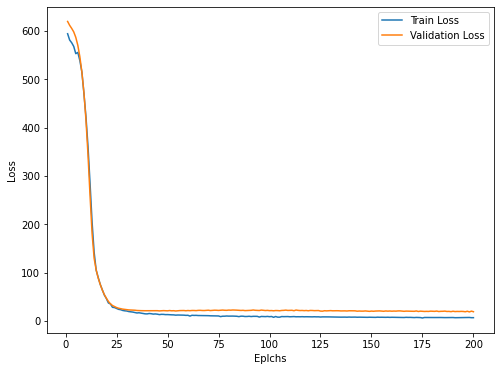

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Eplchs")
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 최종테스트

In [62]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 2ms/step - loss: 18.9611
18.961076736450195 4.354431850017887


#### 추론

In [63]:
new_data = X_test[:5]
pred = model.predict(new_data)

In [64]:
pred

array([[ 7.948782],
       [18.594095],
       [21.37749 ],
       [33.92717 ],
       [23.974976]], dtype=float32)

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [77]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### data 로딩

In [67]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [68]:
# 데이터 shape
print(train_image.shape, test_image.shape)
print(train_label.shape, test_label.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [69]:
# class별 데이터 개수
# train
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [70]:
# test
np.unique(test_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [71]:
# validata set
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [72]:
print(train_image.shape, val_image.shape)
np.unique(train_label, return_counts=True)

(48000, 28, 28) (12000, 28, 28)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800],
       dtype=int64))

In [73]:
# train_image, val_image, test_image : X
# train_label, val_label, test_label : y

#### 이미지 확인

In [80]:
train_label[0], class_names[train_label[0]]

(6, 'Shirt')

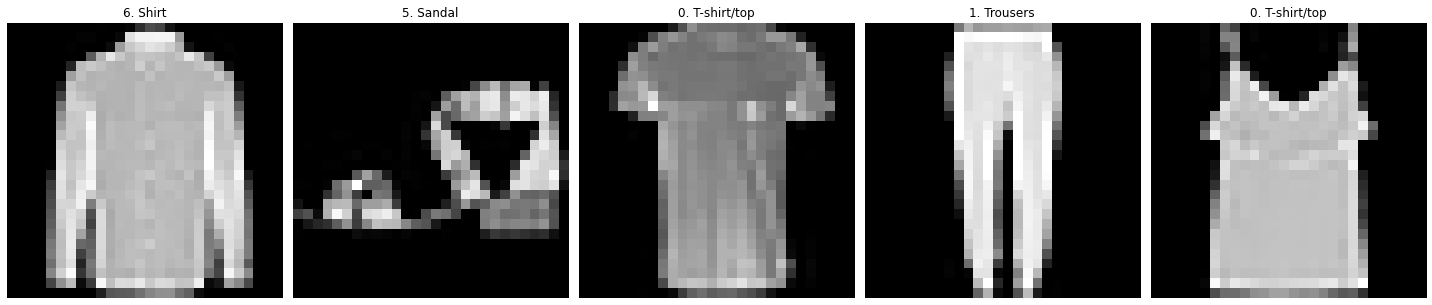

In [82]:
plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f"{train_label[i]}. {class_names[train_label[i]]}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수설정

In [94]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### x,  y값 처리
- y값 처리
    - 다중 분류에서 label encoding형식의 label을 one hot encoding 처리

In [84]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [86]:
# 위에 그림보면 셔츠는 6번 > index 7이라서 밑에 첫째줄에 1이고.. 다른사진들 다같은원리임.
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- x값(이미지) 처리
    - 이미지데이터 전처리 : 0 ~ 1 정규화. X/255.0 => Dataset 생성에서 처리

In [88]:
# X의 타입을 uint8 -> float32 변환
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

In [90]:
# X_train = (train_image/255.0).astype(np.float32)
# X_val = (val_image/255.0).astype(np.float32)
# X_test = (test_image/255.0).astype(np.float32)

#### Dataset 생성
    - 데이터입력 파이프라인

In [95]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
        .map(lambda x,y : (x/255, y))\
        .shuffle(N_TRAIN)\
        .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x,y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x,y:(x/255, y)).batch(N_BATCHS)

#### 모델 생성 및 컴파일

In [96]:
# 모델 생성 함수
def create_mnist_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    # 출력 레이어: 다중분류 - unit개수 : class개수, activation 함수 : softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [113]:
# 모델 생성 및 컴파일
model = create_mnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
             loss='categorical_crossentropy',  # 다중분류 loss:categorical_crossentropy
             metrics=['accuracy'])   # 분류 : metrics(평가지표)로 accuracy를 추가. 

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


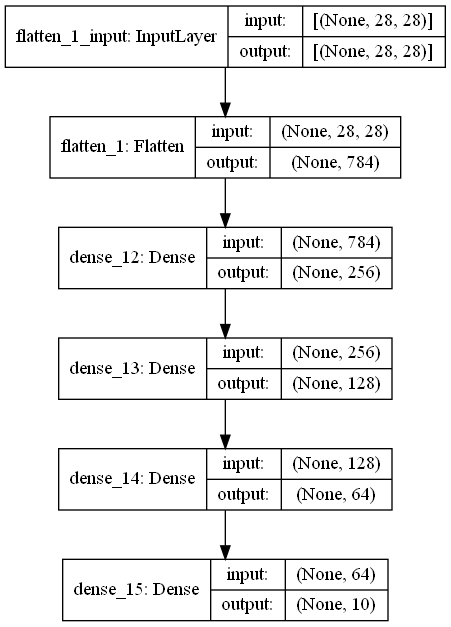

In [115]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

Train

In [116]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/100
480/480 [==============================] - 5s 7ms/step - loss: 1.0557 - accuracy: 0.6204 - val_loss: 0.7626 - val_accuracy: 0.7253
Epoch 2/100
480/480 [==============================] - 5s 8ms/step - loss: 0.6806 - accuracy: 0.7516 - val_loss: 0.6402 - val_accuracy: 0.7627
Epoch 3/100
480/480 [==============================] - 5s 7ms/step - loss: 0.5997 - accuracy: 0.7817 - val_loss: 0.5891 - val_accuracy: 0.7832
Epoch 4/100
480/480 [==============================] - 5s 7ms/step - loss: 0.5392 - accuracy: 0.8050 - val_loss: 0.5327 - val_accuracy: 0.8045
Epoch 5/100
480/480 [==============================] - 5s 9ms/step - loss: 0.5007 - accuracy: 0.8202 - val_loss: 0.4972 - val_accuracy: 0.8201
Epoch 6/100
480/480 [==============================] - 6s 9ms/step - loss: 0.4757 - accuracy: 0.8299 - val_loss: 0.4749 - val_accuracy: 0.8254
Epoch 7/100
480/480 [==============================] - 6s 8ms/step - loss: 0.4538 - accuracy: 0.8365 - val_loss: 0.4571 - val_accuracy: 0.8351

480/480 [==============================] - 6s 9ms/step - loss: 0.1935 - accuracy: 0.9285 - val_loss: 0.3257 - val_accuracy: 0.8880
Epoch 58/100
480/480 [==============================] - 5s 7ms/step - loss: 0.1925 - accuracy: 0.9293 - val_loss: 0.3202 - val_accuracy: 0.8921
Epoch 59/100
480/480 [==============================] - 4s 5ms/step - loss: 0.1866 - accuracy: 0.9304 - val_loss: 0.3193 - val_accuracy: 0.8924
Epoch 60/100
480/480 [==============================] - 4s 6ms/step - loss: 0.1839 - accuracy: 0.9321 - val_loss: 0.3298 - val_accuracy: 0.8902
Epoch 61/100
480/480 [==============================] - 5s 8ms/step - loss: 0.1851 - accuracy: 0.9314 - val_loss: 0.3475 - val_accuracy: 0.8838
Epoch 62/100
480/480 [==============================] - 5s 8ms/step - loss: 0.1814 - accuracy: 0.9327 - val_loss: 0.3344 - val_accuracy: 0.8889
Epoch 63/100
480/480 [==============================] - 5s 7ms/step - loss: 0.1806 - accuracy: 0.9334 - val_loss: 0.3373 - val_accuracy: 0.8903
Epoch

In [117]:
len(hist.history['loss'])

100

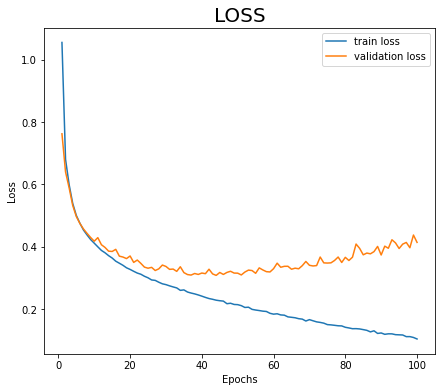

In [118]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

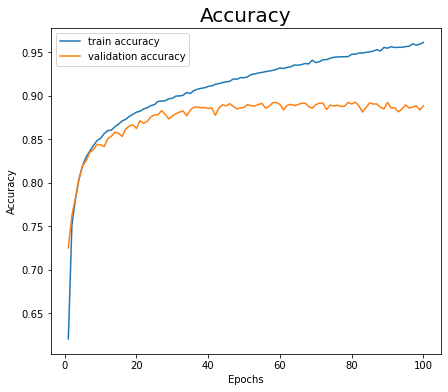

In [119]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [120]:
loss, accuracy = model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.8821


In [121]:
print(loss, accuracy)

0.4620336890220642 0.882099986076355


#### 새로운 데이터 추론

In [122]:
new_input = X_test[:5]
new_input = new_input/255   # 정규화

In [123]:
pred = model.predict(new_input)

In [124]:
pred_class = np.argmax(pred, axis=-1)
pred_class

array([9, 2, 1, 1, 0], dtype=int64)

In [125]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [126]:
class_names = np.array(class_names)
class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'T-shirt/top'],
      dtype='<U11')

### 위스콘신 유방암 데이터셋 - 이진분류 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)